# Movie Recommendation System Data Wrangling

In [1]:
#Load important packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Load the movie dataset, which contains an unique id, the title and the genres
df_movies=pd.read_csv("./data/movies.csv")
df_movies.info()
df_movies.head()
df_movies_copy=df_movies

movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [6]:
#Load the ratings dataset, in which one row shows the rating from a user to a movie
df_ratings=pd.read_csv("./data/ratings.csv")
print("ratings:")
df_ratings.info()

print(df_ratings['rating'].isnull().sum())
df_ratings.head()

ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
0


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [8]:
#Now find the total number of ratings for each movie
#First, need to check if there are movies that have no ratings
in_df_movies=df_movies['movieId'].unique()
in_df_ratings=df_ratings['movieId'].unique()
not_in_df_ratings = list(set(in_df_movies)-set(in_df_ratings))

rating_nums=df_ratings['movieId'].value_counts()

df_movies['rating numbers']=0

df_movies=df_movies.set_index('movieId')
for movieid in rating_nums.index:
    df_movies.at[movieid,'rating numbers']=rating_nums[movieid]





In [9]:
#Find the average rating for each rated movie
df_movies['average rate']=np.nan

average_rates=df_ratings.groupby('movieId')['rating'].agg('mean')

for movieid in rating_nums.index:
    df_movies.at[movieid,'average rate']=average_rates[movieid]
    


In [10]:
#Find all genres
genres_collectives=df_movies['genres'].unique()
print(genres_collectives)
genres=[]
for genres_collective in genres_collectives:
    single_genres=genres_collective.split('|')
    genres=genres+single_genres
genres=list(set(genres))
genres.remove("(no genres listed)")
genres.sort()
print(genres)

#Add each genre as new collumns in df_movies
for genre in genres:
    df_movies[genre]=df_movies['genres'].str.contains(genre)
df_movies=df_movies.drop(columns=['genres'])


['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' ...
 'Children|Comedy|Fantasy|Mystery' 'Children|Comedy|Crime|Fantasy'
 'Comedy|Horror|Mystery|Sci-Fi|Western']
['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [11]:
df_rated=df_movies.dropna()
df_movies.info()
df_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62423 entries, 1 to 209171
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           62423 non-null  object 
 1   rating numbers  62423 non-null  int64  
 2   average rate    59047 non-null  float64
 3   Action          62423 non-null  bool   
 4   Adventure       62423 non-null  bool   
 5   Animation       62423 non-null  bool   
 6   Children        62423 non-null  bool   
 7   Comedy          62423 non-null  bool   
 8   Crime           62423 non-null  bool   
 9   Documentary     62423 non-null  bool   
 10  Drama           62423 non-null  bool   
 11  Fantasy         62423 non-null  bool   
 12  Film-Noir       62423 non-null  bool   
 13  Horror          62423 non-null  bool   
 14  IMAX            62423 non-null  bool   
 15  Musical         62423 non-null  bool   
 16  Mystery         62423 non-null  bool   
 17  Romance         62423 non-null

In [12]:
df_rated.sort_values(by='rating numbers',ascending=False).head()

,title,rating numbers,average rate,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
356,Forrest Gump (1994),81491,4.048011,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
318,"Shawshank Redemption, The (1994)",81482,4.413576,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
296,Pulp Fiction (1994),79672,4.188912,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
593,"Silence of the Lambs, The (1991)",74127,4.151342,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2571,"Matrix, The (1999)",72674,4.154099,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [13]:
#Now plot the distribution rating numbers
xrn=[i*10 for i in range(10000)]
yrn=[]
for x in xrn:
    y=df_rated.loc[df_rated['rating numbers']>=x].count()['rating numbers']
    yrn.append(y)



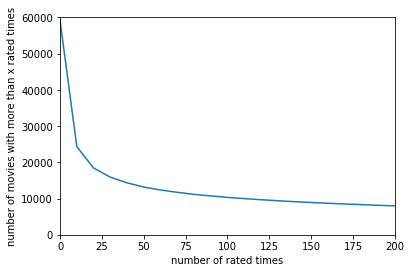

In [14]:
plt.ylim(0,60000)
plt.xlim(0,200)
plt.xlabel("number of rated times")
plt.ylabel("number of movies with more than x rated times")
plt.plot(xrn,yrn)

# It shows that it is reasonable only to consider movies with more than 50 rating times. 

In [15]:
df_popular=df_rated.loc[df_rated['rating numbers']>=50]
df_popular.head()


,title,rating numbers,average rate,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),57309,3.893708,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Jumanji (1995),24228,3.251527,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Grumpier Old Men (1995),11804,3.142028,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,Waiting to Exhale (1995),2523,2.853547,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
5,Father of the Bride Part II (1995),11714,3.058434,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# The movie dataset is extended with the rating numbers and average rate. The genres is also expanded into bool states. Only movies with at least 50 rating numbers will be kept.

In [16]:
df_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 1 to 207830
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           13176 non-null  object 
 1   rating numbers  13176 non-null  int64  
 2   average rate    13176 non-null  float64
 3   Action          13176 non-null  bool   
 4   Adventure       13176 non-null  bool   
 5   Animation       13176 non-null  bool   
 6   Children        13176 non-null  bool   
 7   Comedy          13176 non-null  bool   
 8   Crime           13176 non-null  bool   
 9   Documentary     13176 non-null  bool   
 10  Drama           13176 non-null  bool   
 11  Fantasy         13176 non-null  bool   
 12  Film-Noir       13176 non-null  bool   
 13  Horror          13176 non-null  bool   
 14  IMAX            13176 non-null  bool   
 15  Musical         13176 non-null  bool   
 16  Mystery         13176 non-null  bool   
 17  Romance         13176 non-null

In [17]:
#save dataframe
#df_popular.to_csv('./data/populars.csv')



In [18]:
df_ratings_cleaned=df_ratings.loc[df_ratings['movieId'].isin(df_popular.index)]

In [19]:
dftest=df_ratings.groupby('userId')['movieId'].agg('count')
dftest.head()

userId
1     70
2    184
3    656
4    242
5    101
Name: movieId, dtype: int64

In [20]:
df_users_columns=['Movie Watched','Highest Rate','Lowest Rate','Average Rate']
df_users=df_ratings_cleaned.groupby('userId').agg({'movieId':'count', 
                         'rating':['max','min','mean'] })


In [21]:
df_users.columns=df_users_columns

In [22]:
df_users.head()
df_users.to_csv('./data/users.csv')

In [23]:
genre_counts={}
genre_averages={}

movie_isGenre={}
i=0
for movie in df_popular.index:
    i+=100
    print("dealing movies ",i/len(df_popular.index),'%',end='\r')
    isGenre={}
    for genre in genres:
         isGenre[genre]=df_popular.loc[movie][[genre]].values[0]
    movie_isGenre[movie]=isGenre
    

In [24]:
for user in df_users.index:
    print(100*user/len(df_users.index),'%',end='\r')
    one_count={}
    one_average={}
    for genre in genres:
        one_count[genre]=0
        one_average[genre]=0
    one_count['Other']=0
    one_average['Other']=0
    movies=df_ratings_cleaned.loc[df_ratings_cleaned['userId']==user]['movieId'].values
    ratings=df_ratings_cleaned.loc[df_ratings_cleaned['userId']==user]['rating'].values
    i=0
    for movie in movies:
        isGenre = movie_isGenre[movie]
        rating=ratings[i]
        i+=1
        isOther=True
        genrestr=df_movies_copy[df_movies_copy['movieId']==movie]['genres'].values[0]
        for genre in genres: 
             if isGenre[genre]:
                one_count[genre]+=1
                isOther=False
                one_average[genre]+=rating 
        if isOther:
            one_count['Other']+=1
            one_average['Other']+=rating
    
            
    for key in one_count.keys():
        if one_count[key]:
            one_average[key]/=one_count[key]
        else:
            one_average[key]=np.nan

    genre_counts[user]=one_count
    genre_averages[user]=one_average






In [25]:
df_bygenre_columns1=[ 'Watch Number of '+ genre for genre in genres]
df_bygenre_columns1.append('Watch Number of Others')

df_bygenre_columns2=[ 'Watch Number of '+ genre for genre in genres]
df_bygenre_columns2.append('Mean Rating of Others')

df_bygenre_columns1.extend(df_bygenre_columns2)
df_bygenre_columns=list(df_bygenre_columns1)

print(df_bygenre_columns)

df_bygenre=pd.DataFrame(columns=[df_bygenre_columns],index=df_users.index)
for user in df_users.index:
    print(100*user/len(df_users.index),'%',end='\r')
    for genre in genres:
        df_bygenre.at[user,'Watch Number of '+genre]=genre_counts[user][genre]
        df_bygenre.at[user,'Meaning Rating of '+genre]=genre_averages[user][genre]
    df_bygenre.at[user,'Watch Number of Others']=genre_counts[user]['Other']
    df_bygenre.at[user,'Mean Rating of Others']=genre_averages[user]['Other']
        
df_bygenre.describe()
df_bygenre.info()
df_bygenre.head()
df_bygenre.to_csv('./data/bygenre.csv')

['Watch Number of Action', 'Watch Number of Adventure', 'Watch Number of Animation', 'Watch Number of Children', 'Watch Number of Comedy', 'Watch Number of Crime', 'Watch Number of Documentary', 'Watch Number of Drama', 'Watch Number of Fantasy', 'Watch Number of Film-Noir', 'Watch Number of Horror', 'Watch Number of IMAX', 'Watch Number of Musical', 'Watch Number of Mystery', 'Watch Number of Romance', 'Watch Number of Sci-Fi', 'Watch Number of Thriller', 'Watch Number of War', 'Watch Number of Western', 'Watch Number of Others', 'Mean Rating of Action', 'Mean Rating of Adventure', 'Mean Rating of Animation', 'Mean Rating of Children', 'Mean Rating of Comedy', 'Mean Rating of Crime', 'Mean Rating of Documentary', 'Mean Rating of Drama', 'Mean Rating of Fantasy', 'Mean Rating of Film-Noir', 'Mean Rating of Horror', 'Mean Rating of IMAX', 'Mean Rating of Musical', 'Mean Rating of Mystery', 'Mean Rating of Romance', 'Mean Rating of Sci-Fi', 'Mean Rating of Thriller', 'Mean Rating of War'